In [3]:
import numpy as np
import cv2
import mahotas
from matplotlib import pyplot as plt

Identifação de bordas

In [ ]:
def escreve(img, texto, cor=(255,0,0)):
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, texto, (10,20), fonte, 0.5, cor, 0, cv2.LINE_AA)

imgColorida = cv2.imread('dados.jpg') 
if imgColorida is None:
    print("Erro ao carregar a imagem")
    exit()

img = cv2.cvtColor(imgColorida, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.title("Imagem em tons de cinza")
plt.axis('off')
plt.show()

plt.title("Imagem suavizada")
suave = cv2.blur(img, (7, 7))
plt.imshow(suave, cmap='gray')
plt.axis('off')
plt.show()

T = mahotas.thresholding.otsu(suave)
bin = suave.copy()
bin[bin > T] = 255
bin[bin < 255] = 0
bin = cv2.bitwise_not(bin)
plt.imshow(bin, cmap='gray')
plt.title("Imagem Binarizada")
plt.axis('off')
plt.show()

bordas = cv2.Canny(bin, 100, 150)
plt.title("Imagem com bordas")
plt.imshow(bordas, cmap='gray')
plt.axis('off')
plt.show()

objetos, hierarquia = cv2.findContours(bordas.copy(),
                                      cv2.RETR_EXTERNAL, 
                                      cv2.CHAIN_APPROX_SIMPLE)

escreve(img, "Imagem em tons de cinza", 0)
escreve(suave, "Suavizacao com Blur", 0)
escreve(bin, "Binarizacao com Metodo Otsu", 255)
escreve(bordas, "Detector de bordas Canny", 255)

temp = np.vstack([
    np.hstack([img, suave]),
    np.hstack([bin, bordas])
])

plt.figure(figsize=(12,8))
plt.imshow(temp)
plt.title("Quantidade de objetos: "+str(len(objetos)))
plt.axis('off')
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.title("Quantidade de objetos: "+str(len(objetos)))
plt.axis('off')

imgC2 = imgColorida.copy()
cv2.drawContours(imgC2, objetos, -1, (255, 0, 0), 2)
escreve(imgC2, str(len(objetos))+" objetos encontrados!")

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(imgC2, cv2.COLOR_BGR2RGB))
plt.title("Resultado")
plt.axis('off')
plt.show()

Detecção de faces em imagens

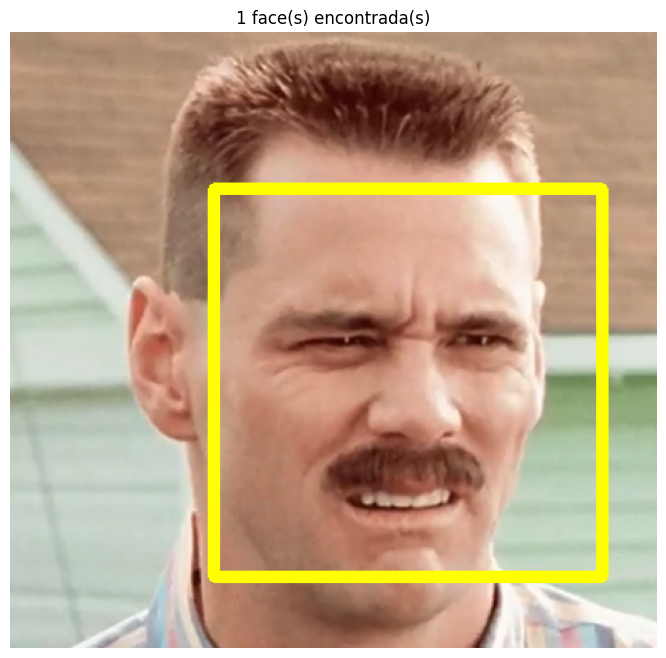

In [54]:
i = cv2.imread('img\\Captura de tela 2024-12-02 161849.png')
iPB = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)

# Detectar faces
df = cv2.CascadeClassifier('haarcascades\\haarcascade_frontalface_alt.xml')
faces = df.detectMultiScale(iPB,
                           scaleFactor=1.05,
                           minNeighbors=7,
                           minSize=(30,30),
                           flags=cv2.CASCADE_SCALE_IMAGE)

for (x, y, w, h) in faces:
    cv2.rectangle(i, (x, y), (x + w, y + h), (0, 255, 255), 7)

plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB)) 
plt.title(f'{len(faces)} face(s) encontrada(s)')
plt.axis('off')
plt.show()